## 1 Importing libs and configuring parameters

In [1]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

Image.MAX_IMAGE_PIXELS = None

REPO_DIR = "pytorch-CycleGAN-and-pix2pix"
EXPERIMENT_NAME = "cloud_removal_pix2pix_v2"

N_EPOCHS = 50
N_EPOCHS_DECAY = 30
BATCH_SIZE = 8
LOAD_SIZE = 512
CROP_SIZE = 512
GPU_IDS = "0"

## 2 Define the evaluation function

In [2]:
def calculate_metrics_with_mask(img_real, img_fake, threshold=10):
    valid_mask = np.all(img_real > threshold, axis=2) & np.all(img_fake > threshold, axis=2)
    
    if np.sum(valid_mask) < 100:
        return None, None
    
    img_real_masked = img_real.copy()
    img_fake_masked = img_fake.copy()
    
    for c in range(3):
        img_real_masked[:,:,c] = img_real[:,:,c] * valid_mask
        img_fake_masked[:,:,c] = img_fake[:,:,c] * valid_mask
    
    try:
        psnr_value = psnr(img_real_masked, img_fake_masked, data_range=255)
        ssim_value = ssim(img_real_masked, img_fake_masked, data_range=255, channel_axis=2, win_size=7)
        return psnr_value, ssim_value
    except:
        return None, None

## 3 Clone the repo and proceed with training

In [3]:
if not os.path.exists(REPO_DIR):
    print("Cloning repository...")
    os.system("git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git")
    print("Repository cloned\n")

os.chdir(REPO_DIR)

train_command = f"""python train.py \
  --dataroot ../dataset \
  --name {EXPERIMENT_NAME} \
  --model pix2pix \
  --direction AtoB \
  --load_size {LOAD_SIZE} \
  --crop_size {CROP_SIZE} \
  --batch_size {BATCH_SIZE} \
  --n_epochs {N_EPOCHS} \
  --n_epochs_decay {N_EPOCHS_DECAY} \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --print_freq 100
"""

os.system(train_command)

os.chdir("..")

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 512                           	[default: 256]
                 dataroot: ../dataset                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
             display_freq: 400                           
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
                 gan_mode: vanilla                       
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                

/home/ubuntu/projects/ai4eo/pytorch-CycleGAN-and-pix2pix/models/base_model.py:182: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  errors_ret[name] = float(getattr(self, "loss_" + name))  # float(...) works for both scalar tensor and float number


[Rank 0] (epoch: 2, iters: 56, time: 0.074, data: 10.024) , G_GAN: 0.939, G_L1: 31.046, D_real: 0.577, D_fake: 0.735

learning rate 0.0002000 -> 0.0002000
End of epoch 2 / 80 	 Time Taken: 63 sec
[Rank 0] (epoch: 3, iters: 112, time: 0.110, data: 0.004) , G_GAN: 0.988, G_L1: 18.353, D_real: 0.577, D_fake: 0.654

learning rate 0.0002000 -> 0.0002000
End of epoch 3 / 80 	 Time Taken: 71 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 4 / 80 	 Time Taken: 69 sec
[Rank 0] (epoch: 5, iters: 24, time: 0.066, data: 0.004) , G_GAN: 1.286, G_L1: 14.472, D_real: 0.224, D_fake: 0.498

learning rate 0.0002000 -> 0.0002000
saving the model at the end of epoch 5, iters 720
End of epoch 5 / 80 	 Time Taken: 74 sec
[Rank 0] (epoch: 6, iters: 80, time: 0.050, data: 0.004) , G_GAN: 1.883, G_L1: 13.306, D_real: 0.323, D_fake: 0.194

learning rate 0.0002000 -> 0.0002000
End of epoch 6 / 80 	 Time Taken: 66 sec
[Rank 0] (epoch: 7, iters: 136, time: 0.039, data: 3.327) , G_GAN: 2.597, G_L1: 15.662, D_

## 4 Gen test results

In [4]:
os.chdir(REPO_DIR)

test_command = f"""python test.py \
  --dataroot ../dataset \
  --name {EXPERIMENT_NAME} \
  --model pix2pix \
  --direction AtoB \
  --phase test \
  --num_test 1000 \
  --eval
"""

print("Generating test results...\n")

os.system(test_command)

os.chdir("..")

print(f"\nResults: {REPO_DIR}/results/{EXPERIMENT_NAME}/test_latest/index.html")

Generating test results...

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ../dataset                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: True                          	[default: False]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0

/home/ubuntu/miniconda3/envs/pytorch-img2img/lib/python3.11/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (89620052 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/ubuntu/miniconda3/envs/pytorch-img2img/lib/python3.11/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (116998860 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


processing (0005)-th image... ['../dataset/test/pair_0005.png']


/home/ubuntu/miniconda3/envs/pytorch-img2img/lib/python3.11/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (97201536 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


processing (0010)-th image... ['../dataset/test/pair_0010.png']
processing (0015)-th image... ['../dataset/test/pair_0015.png']


/home/ubuntu/miniconda3/envs/pytorch-img2img/lib/python3.11/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (103687360 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


processing (0020)-th image... ['../dataset/test/pair_0020.png']
processing (0025)-th image... ['../dataset/test/pair_0025.png']

Results: pytorch-CycleGAN-and-pix2pix/results/cloud_removal_pix2pix_v2/test_latest/index.html


## 5 Evaluation

In [5]:
result_dir = f"{REPO_DIR}/results/{EXPERIMENT_NAME}/test_latest/images"

psnr_scores = []
ssim_scores = []

image_files = sorted([f for f in os.listdir(result_dir) if f.endswith('_fake_B.png')])

print(f"Evaluating {len(image_files)} images...\n")

for img_file in tqdm(image_files):
    real_file = img_file.replace('_fake_B.png', '_real_B.png')
    
    fake_path = os.path.join(result_dir, img_file)
    real_path = os.path.join(result_dir, real_file)
    
    if not os.path.exists(real_path):
        continue
    
    img_fake = cv2.imread(fake_path)
    img_real = cv2.imread(real_path)
    
    if img_fake is None or img_real is None:
        continue
    
    psnr_val, ssim_val = calculate_metrics_with_mask(img_real, img_fake)
    
    if psnr_val is not None:
        psnr_scores.append(psnr_val)
        ssim_scores.append(ssim_val)

print(f"\nValid images: {len(psnr_scores)}")
print(f"PSNR: {np.mean(psnr_scores):.4f} ± {np.std(psnr_scores):.4f} dB")
print(f"SSIM: {np.mean(ssim_scores):.4f} ± {np.std(ssim_scores):.4f}")

Evaluating 30 images...



  0%|          | 0/30 [00:00<?, ?it/s]


Valid images: 30
PSNR: 22.5923 ± 6.7995 dB
SSIM: 0.5946 ± 0.2372


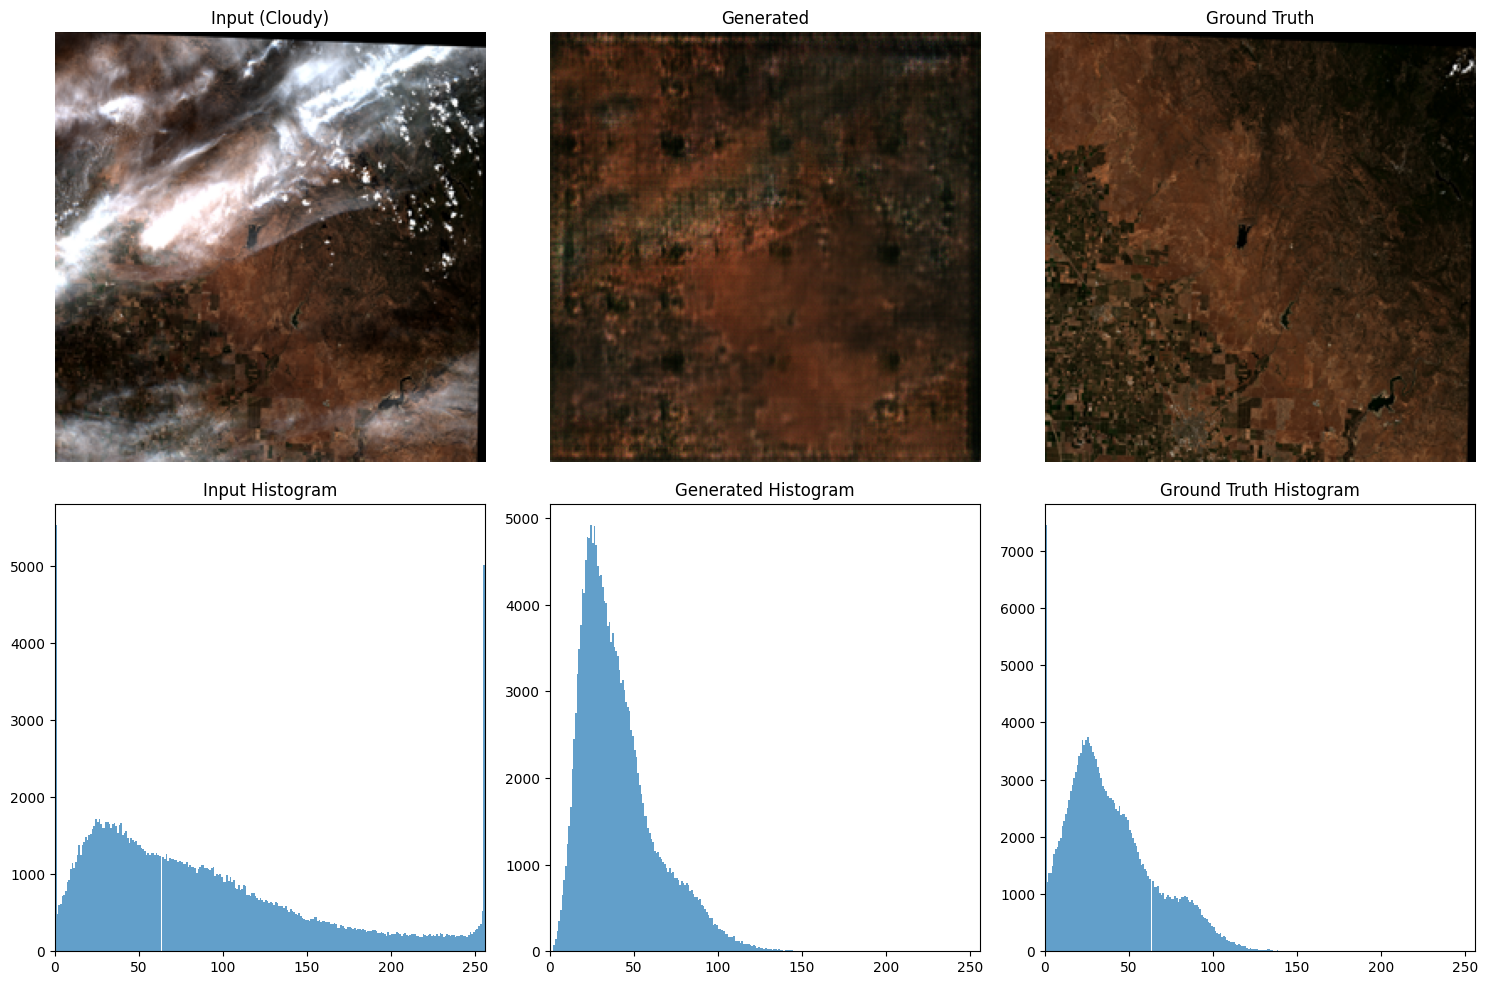

Input value range: [0, 255]
Generated value range: [1, 177]
Ground truth value range: [0, 255]
Percentage of zero pixels in generated: 0.00%


In [6]:
import random

result_dir = f"{REPO_DIR}/results/{EXPERIMENT_NAME}/test_latest/images"
image_files = sorted([f for f in os.listdir(result_dir) if f.endswith('_fake_B.png')])

sample_file = random.choice(image_files)
real_A = cv2.imread(os.path.join(result_dir, sample_file.replace('_fake_B.png', '_real_A.png')))
real_B = cv2.imread(os.path.join(result_dir, sample_file.replace('_fake_B.png', '_real_B.png')))
fake_B = cv2.imread(os.path.join(result_dir, sample_file))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(cv2.cvtColor(real_A, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Input (Cloudy)')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(fake_B, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Generated')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(real_B, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Ground Truth')
axes[0, 2].axis('off')

axes[1, 0].hist(real_A.ravel(), bins=256, range=(0, 256), alpha=0.7)
axes[1, 0].set_title('Input Histogram')
axes[1, 0].set_xlim([0, 256])

axes[1, 1].hist(fake_B.ravel(), bins=256, range=(0, 256), alpha=0.7)
axes[1, 1].set_title('Generated Histogram')
axes[1, 1].set_xlim([0, 256])

axes[1, 2].hist(real_B.ravel(), bins=256, range=(0, 256), alpha=0.7)
axes[1, 2].set_title('Ground Truth Histogram')
axes[1, 2].set_xlim([0, 256])

plt.tight_layout()
plt.show()

print(f"Input value range: [{real_A.min()}, {real_A.max()}]")
print(f"Generated value range: [{fake_B.min()}, {fake_B.max()}]")
print(f"Ground truth value range: [{real_B.min()}, {real_B.max()}]")
print(f"Percentage of zero pixels in generated: {(fake_B == 0).sum() / fake_B.size * 100:.2f}%")

## 6 Visualization

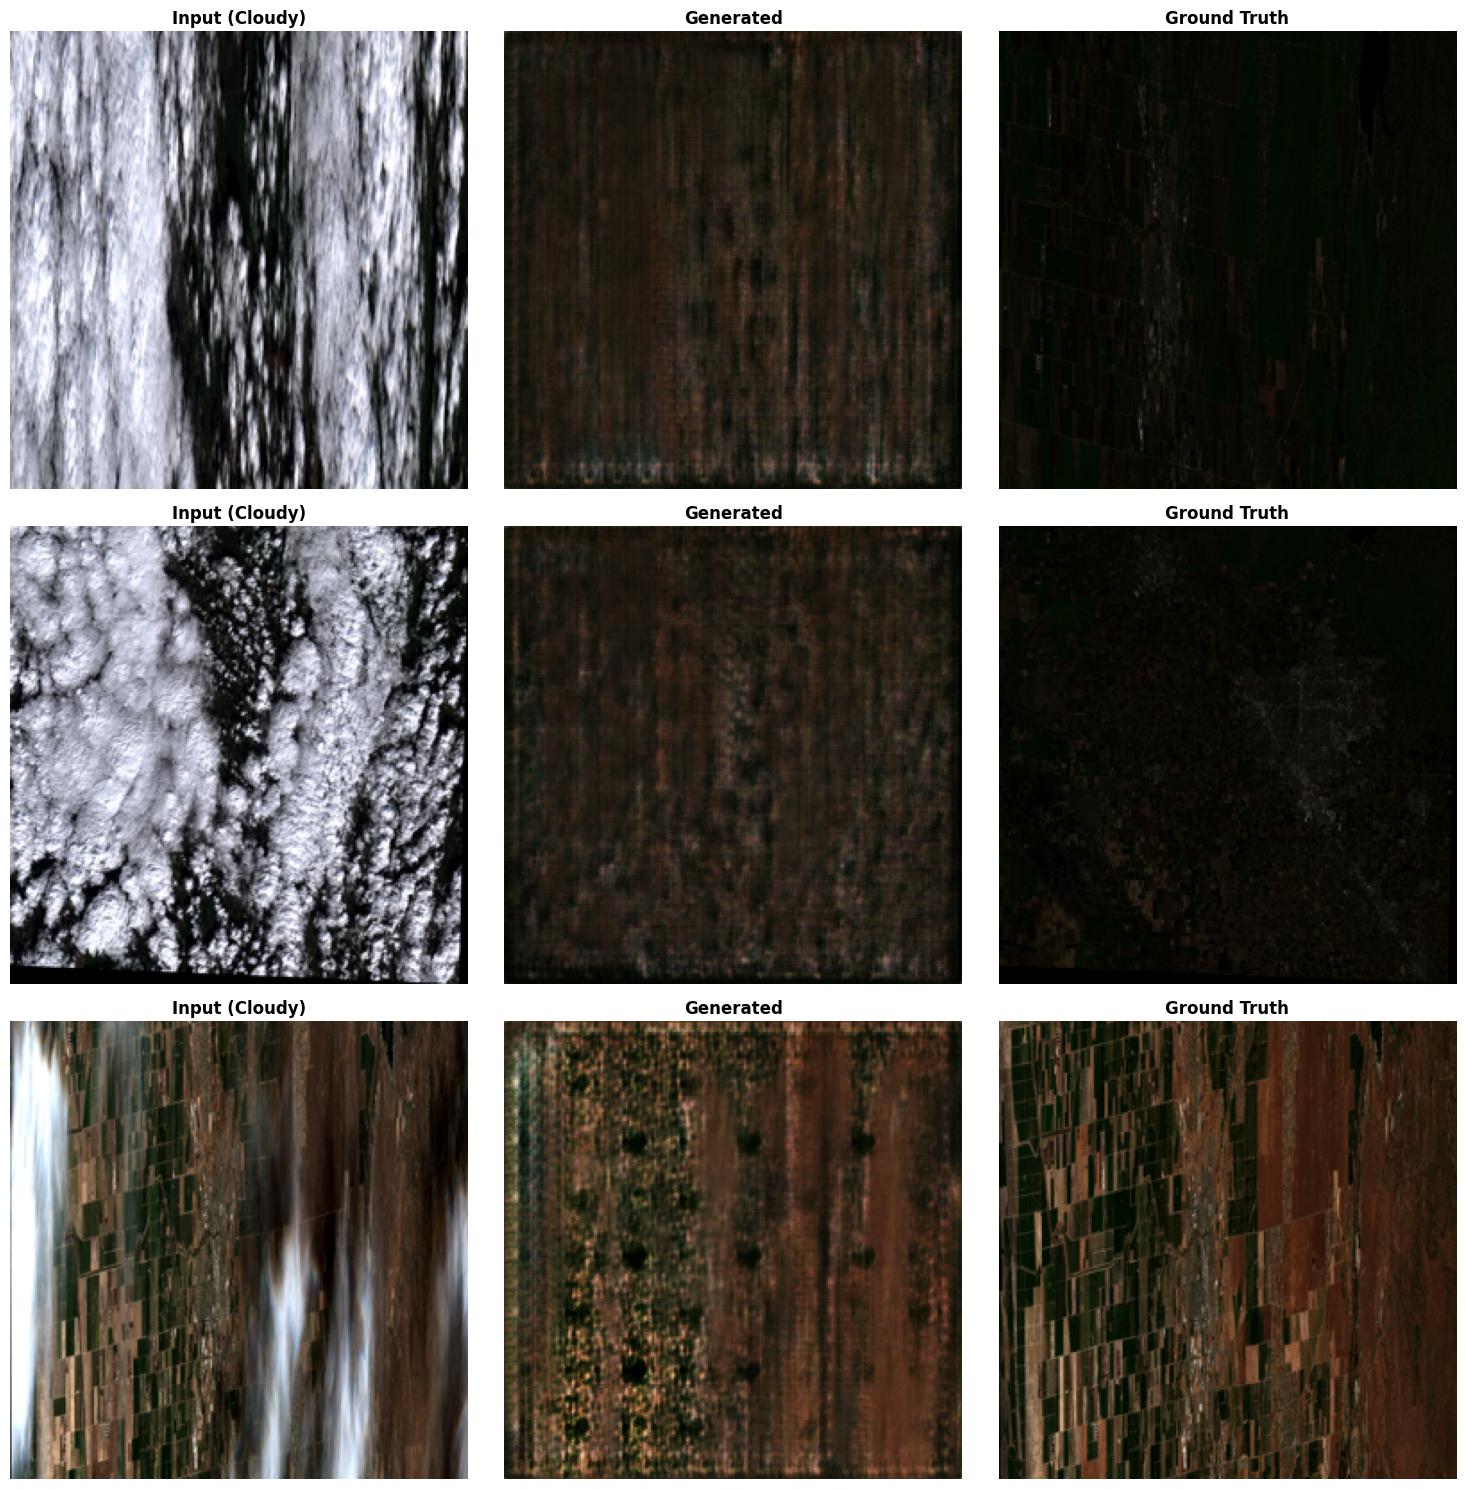

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sample_files = image_files[:3]

for idx, img_file in enumerate(sample_files):
    input_file = img_file.replace('_fake_B.png', '_real_A.png')
    real_file = img_file.replace('_fake_B.png', '_real_B.png')
    
    img_input = cv2.imread(os.path.join(result_dir, input_file))
    img_fake = cv2.imread(os.path.join(result_dir, img_file))
    img_real = cv2.imread(os.path.join(result_dir, real_file))
    
    img_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB)
    img_fake = cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB)
    img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
    
    axes[idx, 0].imshow(img_input)
    axes[idx, 0].set_title('Input (Cloudy)', fontsize=12, fontweight='bold')
    axes[idx, 0].axis('off')
    
    axes[idx, 1].imshow(img_fake)
    axes[idx, 1].set_title('Generated', fontsize=12, fontweight='bold')
    axes[idx, 1].axis('off')
    
    axes[idx, 2].imshow(img_real)
    axes[idx, 2].set_title('Ground Truth', fontsize=12, fontweight='bold')
    axes[idx, 2].axis('off')

plt.tight_layout()
plt.show()